수치를 입력해서 수치를 예측하는 모델들에 대해서 알아보겠습니다. 수치예측을 위한 데이터셋 생성을 해보고, 선형회귀를 위한 가장 간단한 퍼셉트론 모델부터 깊은 다층퍼셉트론 모델까지 구성 및 학습을 시켜보겠습니다

In [1]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters

max_features = 20000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

Using Theano backend.


In [2]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

max_features = 20000
text_max_words = 80

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

In [3]:
sum_i = 0
for i in x_train:
    sum_i += len(i)
    
print(sum_i/x_train.shape[0])

145


In [4]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [5]:
x_test.shape

(2246,)

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 5s - loss: 1.9268 - acc: 0.5294 - val_loss: 1.4634 - val_acc: 0.6680
Epoch 2/10
7000/7000 [==============================] - 5s - loss: 0.8478 - acc: 0.8100 - val_loss: 1.2864 - val_acc: 0.7079
Epoch 3/10
7000/7000 [==============================] - 5s - loss: 0.2852 - acc: 0.9509 - val_loss: 1.3537 - val_acc: 0.6897
Epoch 4/10
7000/7000 [==============================] - 5s - loss: 0.1897 - acc: 0.9617 - val_loss: 1.3561 - val_acc: 0.6912
Epoch 5/10
7000/7000 [==============================] - 5s - loss: 0.1555 - acc: 0.9617 - val_loss: 1.3339 - val_acc: 0.7023
Epoch 6/10
7000/7000 [==============================] - 5s - loss: 0.1396 - acc: 0.9610 - val_loss: 1.3584 - val_acc: 0.7053
Epoch 7/10
7000/7000 [==============================] - 5s - loss: 0.1270 - acc: 0.9630 - val_loss: 1.4162 - val_acc: 0.6877
Epoch 8/10
7000/7000 [==============================] - 5s - loss: 0.1166 - a

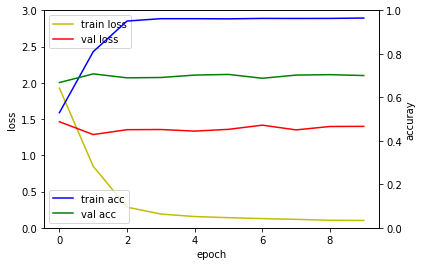

1600/2246 [====================>.........] - ETA: 0s## evaluation loss and_metrics ##
[1.4420637417773743, 0.68788958147818347]


In [6]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : # cut texts after this number of words (among top max_features most common words)
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
#yhat_test = model.predict(xhat_test, batch_size=64)

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 30s - loss: 2.4730 - acc: 0.3663 - val_loss: 1.9846 - val_acc: 0.4511
Epoch 2/10
7000/7000 [==============================] - 30s - loss: 1.8508 - acc: 0.5047 - val_loss: 1.9489 - val_acc: 0.4026
Epoch 3/10
7000/7000 [==============================] - 31s - loss: 1.7459 - acc: 0.5123 - val_loss: 1.7041 - val_acc: 0.5409
Epoch 4/10
7000/7000 [==============================] - 31s - loss: 1.5283 - acc: 0.5787 - val_loss: 1.6623 - val_acc: 0.5535
Epoch 5/10
7000/7000 [==============================] - 30s - loss: 1.3179 - acc: 0.6393 - val_loss: 1.5242 - val_acc: 0.6085
Epoch 6/10
7000/7000 [==============================] - 30s - loss: 1.0751 - acc: 0.7061 - val_loss: 1.4645 - val_acc: 0.6342
Epoch 7/10
7000/7000 [==============================] - 30s - loss: 0.8763 - acc: 0.7676 - val_loss: 1.4962 - val_acc: 0.6488
Epoch 8/10
7000/7000 [==============================] - 30s - loss: 0.

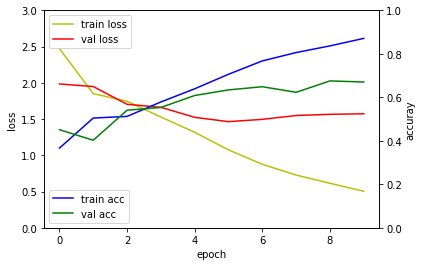

2240/2246 [============================>.] - ETA: 0s## evaluation loss and_metrics ##
[1.7008209377129164, 0.63980409619750878]


In [7]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : # cut texts after this number of words (among top max_features most common words)
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)


# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
#yhat_test = model.predict(xhat_test, batch_size=64)

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 15s - loss: 2.2854 - acc: 0.4627 - val_loss: 1.6929 - val_acc: 0.5843
Epoch 2/10
7000/7000 [==============================] - 15s - loss: 1.5099 - acc: 0.6400 - val_loss: 1.2968 - val_acc: 0.6867
Epoch 3/10
7000/7000 [==============================] - 15s - loss: 1.2106 - acc: 0.7046 - val_loss: 1.1842 - val_acc: 0.7139
Epoch 4/10
7000/7000 [==============================] - 15s - loss: 0.9912 - acc: 0.7547 - val_loss: 1.0909 - val_acc: 0.7381
Epoch 5/10
7000/7000 [==============================] - 15s - loss: 0.7964 - acc: 0.7981 - val_loss: 1.0692 - val_acc: 0.7442
Epoch 6/10
7000/7000 [==============================] - 15s - loss: 0.6260 - acc: 0.8394 - val_loss: 1.0837 - val_acc: 0.7523
Epoch 7/10
7000/7000 [==============================] - 15s - loss: 0.4943 - acc: 0.8679 - val_loss: 1.1336 - val_acc: 0.7472
Epoch 8/10
7000/7000 [==============================] - 15s - loss: 0.

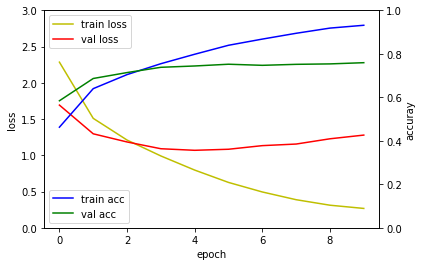

2240/2246 [============================>.] - ETA: 0s## evaluation loss and_metrics ##
[1.3962882223239672, 0.73107747111273791]


In [8]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : # cut texts after this number of words (among top max_features most common words)
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
#yhat_test = model.predict(xhat_test, batch_size=64)

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 24s - loss: 2.1407 - acc: 0.4517 - val_loss: 1.7091 - val_acc: 0.5585
Epoch 2/10
7000/7000 [==============================] - 24s - loss: 1.5742 - acc: 0.5926 - val_loss: 1.4923 - val_acc: 0.6160
Epoch 3/10
7000/7000 [==============================] - 24s - loss: 1.2954 - acc: 0.6624 - val_loss: 1.4167 - val_acc: 0.6443
Epoch 4/10
7000/7000 [==============================] - 24s - loss: 1.0494 - acc: 0.7256 - val_loss: 1.3573 - val_acc: 0.6715
Epoch 5/10
7000/7000 [==============================] - 24s - loss: 0.8290 - acc: 0.7881 - val_loss: 1.3680 - val_acc: 0.6816
Epoch 6/10
7000/7000 [==============================] - 24s - loss: 0.6762 - acc: 0.8243 - val_loss: 1.3851 - val_acc: 0.6862
Epoch 7/10
7000/7000 [==============================] - 24s - loss: 0.5506 - acc: 0.8596 - val_loss: 1.4256 - val_acc: 0.6988
Epoch 8/10
7000/7000 [==============================] - 24s - loss: 0.

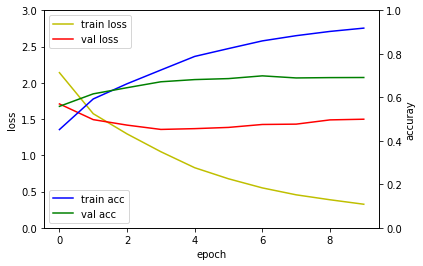

2240/2246 [============================>.] - ETA: 0s## evaluation loss and_metrics ##
[1.580850478059356, 0.67497773820124662]


In [9]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : # cut texts after this number of words (among top max_features most common words)
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)


# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
#yhat_test = model.predict(xhat_test, batch_size=64)

---
### 레이어 준비

수치예측 모델에 사용할 레이어는 `Dense`와 `Activation`입니다. `Activation`에는 은닉층(hidden layer)에 사용할 `relu`를 준비했습니다. 데이터셋은 일차원 벡터만 다루도록 하겠습니다.

|종류|구분|상세구분|브릭|
|:-:|:-:|:-:|:-:|
|데이터셋|Vector|-|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|
|레이어|Dense||![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|
|레이어|Activation|relu|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|

---
### 모델 준비

수치예측을 하기 위해 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`을 준비했습니다.

#### 선형회귀 모델

가장 간단한 1차 선형회귀 모델로 수치예측을 해보겠습니다. 아래 식에서 x, y는 우리가 만든 데이터셋이고, 회귀분석을 통해서, w와 b값을 구하는 것이 목표입니다. 

    Y = w * X + b
   
w와 b값을 구하게 되면, 임의의 입력 x에 대해서 출력 y가 나오는 데 이것이 예측 값입니다. w, b 값은 분산, 공분산, 평균을 이용하여 쉽게 구할 수 있습니다. 

    w = np.cov(X, Y, bias=1)[0,1] / np.var(X)
    b = np.average(Y) - w * np.average(X)
    
간단한 수식이지만 이 수식을 도출하기란 꽤나 복잡습니다. 오차를 최소화하는 극대값을 구하기 위해 편미분을 수행하고, 다시 식을 전개하는 등등의 과정이 필요합니다.

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_0.png)    

#### 퍼셉트론 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인 Y = w * X + b를 풀기 위한 모델입니다. 수치 예측을 하기 위해서 출력 레이어에 별도의 활성화 함수를 사용하지 않았습니다. w, b 값이 손으로 푼 선형회귀 최적해에 근접하려면 경우에 따라 만번이상의 에포크가 필요합니다. 실제로 사용하지는 않는 모델이지만 선형회귀부터 공부하시는 분들에게는 입문 모델로 나쁘지 않습니다.

    model = Sequential()
    model.add(Dense(1, input_dim=1))
        
![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_1m.png)

#### 다층퍼셉트론 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(1))

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_2m.png)

#### 깊은 다층퍼셉트론 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_3m.png)    

---
### 전체 소스

앞서 살펴본 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`의 전체 소스는 다음과 같습니다. 

#### 다층퍼셉트론 모델

#### 깊은 다층퍼셉트론 모델

---

### 학습결과 비교

퍼셉트론 > 다층퍼셉트론 > 깊은 다층퍼셉트론 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론|다층퍼셉트론|깊은 다층퍼셉트론|
|:-:|:-:|:-:|
|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 결론

수치예측을 위한 퍼셉트론, 다층퍼셉트론, 깊은 다층퍼셉트론 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4m.png)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/lecture/)